In [2]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import numpy as np
from math import cos, sin, pi, atan2, sqrt, acos
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import rc
from IPython.display import HTML

In [3]:
from quadruped import DiscreteRippleGait
from quadruped import Leg4

In [10]:
# when i call the animation, this will make it work
rc('animation', html='html5')

In [11]:
def walk(cmd):
    data = {
        # [ length, (limits), offset]
        'coxa':   [52, [-90, 90], 150],
        'femur':  [90, [-100, 100], 150],   # fixme
        'tibia':  [89, [-190, 120], 220],  # fixme
        'tarsus': [90, [-90, 90], 150],

        # gait
        # Angles: 0.00 75.60 -120.39 -45.22
        # 0.00 93.51 -138.68 -44.83
        'stand': [0, 94, -139, -45],  # this determines the neutral leg position
        # 'sit': [0, 90, -90, -90],

        # engine
        # 'serialPort': '/dev/tty.usbserial-A506BOT5'
    }

    leg = Leg4(data)  # 4 servo leg
    gait = DiscreteRippleGait(35.0, leg.getNeutralPos())  # ripple gait
    # cmd = [1,0,0]                             # go straight
    # cmd = [0,0,pi/2]                             # turn
    pts = gait.oneCycle_alt(*cmd)              # array of 3d foot pts
    # print(pts)
    angle = leg.generateServoAngles_alt(pts)  # array of leg servo angles
    # print(angle)
    return pts, angle

In [12]:
pts, angle = walk([1,0,0])

DH2Servo[1] error 117 > 100
DH2Servo[1] error 113 > 100
DH2Servo[1] error 101 > 100
DH2Servo[1] error 104 > 100
DH2Servo[1] error 101 > 100
DH2Servo[1] error 104 > 100
DH2Servo[1] error 117 > 100
DH2Servo[1] error 113 > 100
DH2Servo[1] error 106 > 100
DH2Servo[1] error 104 > 100
DH2Servo[1] error 101 > 100
DH2Servo[1] error 105 > 100
DH2Servo[1] error 108 > 100
DH2Servo[1] error 105 > 100
DH2Servo[1] error 108 > 100
DH2Servo[1] error 106 > 100
DH2Servo[1] error 104 > 100
DH2Servo[1] error 101 > 100


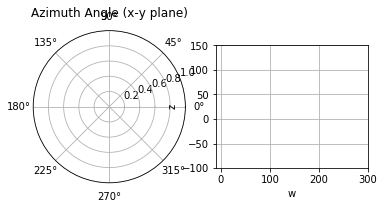

In [13]:
fig = plt.figure()

# radial plot 
ax1 = fig.add_subplot(121,projection='polar')
ax1.set_title('Azimuth Angle (x-y plane)')
# line1, = ax1.plot([], [], lw=2)
line1 = Line2D([], [], color='black')
ax1.add_line(line1)
# ax1.set_aspect('equal', 'datalim')

# scatter plot
ax2 = fig.add_subplot(122, aspect='equal')
# line2, = ax2.plot([], [], lw=2)
line2 = Line2D([], [], color='black', linewidth=2)
ax2.set_xlabel('w')
ax2.set_ylabel('z')
ax2.add_line(line2)
ax2.set_xlim(-10, 300)
ax2.set_ylim(-100, 150)
# ax2.set_aspect('equal')
ax2.grid()  # turn grid on


def rplot(t1, t2, t3, t4, degrees=True):
    """Given the 4 joint angles (in rads), plot the arm in the x-y and w-z planes

    x = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*cos(t1)
    y = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*sin(t1)
    z = l1*sin(t2) + l2*sin(t2 + t3) + l3*sin(t2 + t3 + t4)
    """
    l1 = 52
    l2 = 89
    l3 = 90
    l4 = 95

    ptsx = [0]
    ptsy = [0]

    if degrees:
        t1 *= pi/180
        t2 *= pi/180
        t3 *= pi/180
        t4 *= pi/180


    # our definition is reverse or these joints
    # link 1
    x0 = l1
    y0 = 0
    ptsx.append(x0)
    ptsy.append(y0)

    # link 2
    x1 = x0 + l2*cos(t2)
    y1 = y0 + l2*sin(t2)
    ptsx.append(x1)
    ptsy.append(y1)

    # link 3
    x2 = x1 + l3*cos(t2 + t3)
    y2 = y1 + l3*sin(t2 + t3)
    ptsx.append(x2)
    ptsy.append(y2)

    # link 4
    x3 = x2 + l4*cos(t2 + t3 + t4)
    y3 = y2 + l4*sin(t2 + t3 + t4)
    ptsx.append(x3)
    ptsy.append(y3)

    line1.set_data([0, t1], [0, 1.0])
    line2.set_data(ptsx, ptsy)
    return (line1, line2)

def animate(framedata):
    i = framedata
    angles = angle[0][i]
    # put back into DH space, note, the offsets aren't all the same
    aa = [a-o for a,o in zip(angles, [150,150,220,150])]
    return rplot(*aa)

In [14]:
ani = animation.FuncAnimation(fig, animate, frames=len(angle[0]), interval=200, blit=True)
ani

In [17]:
def run():
    fig = plt.figure()

    # radial plot 
    ax1 = fig.add_subplot(121,projection='polar')
    ax1.set_title('Azimuth Angle (x-y plane)')
    # line1, = ax1.plot([], [], lw=2)
    line1 = Line2D([], [], color='black')
    ax1.add_line(line1)
    # ax1.set_aspect('equal', 'datalim')

    # scatter plot
    ax2 = fig.add_subplot(122, aspect='equal')
    # line2, = ax2.plot([], [], lw=2)
    line2 = Line2D([], [], color='black', linewidth=2)
    ax2.set_xlabel('w')
    ax2.set_ylabel('z')
    ax2.add_line(line2)
    ax2.set_xlim(-10, 300)
    ax2.set_ylim(-100, 150)
    # ax2.set_aspect('equal')
    ax2.grid()  # turn grid on
    
    ani = animation.FuncAnimation(fig, animate, frames=len(angle[0]), interval=200, blit=True)
    return ani

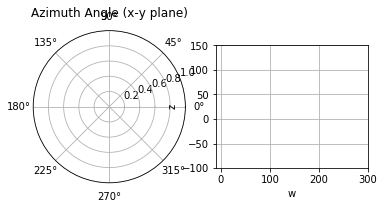

In [19]:
ani = run()
ani